In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [123]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

drugs = ['Capomulin','Infubinol','Ketapril','Placebo']

# Combine the data into a single dataset
cp_df = pd.merge(m_df,ct_df)

# Display the data table for preview
cp_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gb1 = cp_df.groupby(['Drug','Timepoint'])
gb1_agg = gb1.agg({
    'Tumor Volume (mm3)':['mean']
})

# Convert to DataFrame
mv_bdt = pd.DataFrame(gb1_agg)
# Preview DataFrame
mv_bdt.head()

Tumor Volume (mm3)
                                  mean
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gb2 = cp_df.groupby(['Drug','Timepoint'])
gb2_agg = gb2.agg({
    'Tumor Volume (mm3)':['sem']
})
# Convert to DataFrame
sem_gdt = pd.DataFrame(gb2_agg)
# Preview DataFrame
sem_gdt.head()



Tumor Volume (mm3)
                                   sem
Drug      Timepoint                   
Capomulin 0                   0.000000
          5                   0.448593
          10                  0.702684
          15                  0.838617
          20                  0.909731

In [127]:
df3 = pd.pivot_table(mv_bdt,index='Timepoint',columns='Drug')
df4 = pd.pivot_table(sem_gdt,index='Timepoint',columns='Drug')

df3.columns = df3.columns.droplevel()
df3.columns = df3.columns.droplevel()

df4.columns = df4.columns.droplevel()
df4.columns = df4.columns.droplevel()

df3 = df3[drugs]

df3.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [ ]:
df3[]

In [58]:
df3.head()
df3.index.values.tolist()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

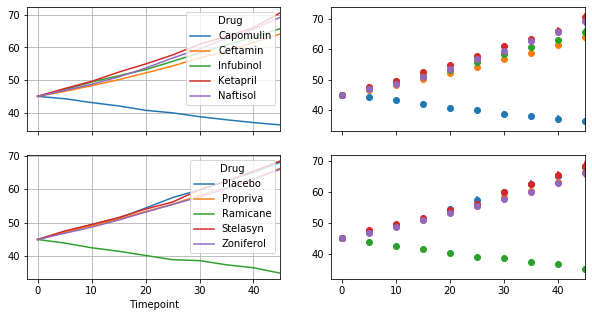

In [71]:
fig, ax = plt.subplots(2,2,sharex=True)

df3.plot.line(y=df3.columns[:5],ax=ax[0,0])
df3.plot.line(y=df3.columns[5:],ax=ax[1,0],xlim=(-2,45))

count = 0
for i in df3.columns:
    if count < 5:
        ax[0,1].errorbar(df4.index.values.tolist(),df3[i],df4[i],fmt='o')
    else:
        ax[1,1].errorbar(df4.index.values.tolist(),df3[i],df4[i],fmt='o')
    count+=1

ax[0,0].grid()
ax[1,0].grid()

fig.set_size_inches(10,5)

In [73]:
df3['Capomulin'][0]

45.0

In [81]:
a = [1,.99,.94,.58]
l = list(map(lambda x: x*100, a))
l

[100, 99.0, 94.0, 57.99999999999999]

In [82]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
gb1_agg5 = gb1.agg({
    'Mouse ID':['count']
})
# Convert to DataFrame
df7 = pd.DataFrame(gb1_agg5)
df7.reset_index()
df7.columns = df7.columns.droplevel()
#df7.index = range(0,100)
# Preview DataFrame
df7.head()

count
Drug      Timepoint       
Capomulin 0             25
          5             25
          10            25
          15            24
          20            23

In [87]:
# Minor Data Munging to Re-Format the Data Frames
df7 = pd.pivot_table(df7,index='Timepoint',columns='Drug')

df7.columns = df7.columns.droplevel()

# Preview the Data Frame
df7.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [118]:
def percent(i):
    max = i.values[0]
    arr = []
    
    for x in i.values:
        perc = (x/max)
        arr.append(perc)
    arr = list(map(lambda x:x*100, arr))
    return arr

In [120]:
thing = df7.apply(percent)

In [121]:
thing

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0
